### **Installing Librarires**

In [2]:
# Install necessary libraries if not already installed
!pip install tld
!pip install colorama
!pip install pandas
!pip install torch torchvision torchaudio
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install tabulate



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.9 MB/s eta 0:00:00


### **Importing Necessary Libraries**

In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from colorama import Fore
from urllib.parse import urlparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# Function to extract TLD from a URL
def extract_tld(url):
    try:
        return get_tld(url, as_object=True).fld
    except:
        return None

### **Loading the Dataset**

In [4]:
import pandas as pd
from tabulate import tabulate

'''
from google.colab import files
files.upload()
file = 'malicious_phish.csv'
'''

# Assuming the CSV file is in the specified path
file_path = 'https://drive.google.com/uc?id=1hVTzUkdLfLcAAO7iV8EtWMduy0HrOP5b'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first 20 rows of the DataFrame
#print(data.head(20))

# Display the first 20 rows of the DataFrame with borders
data_truncated = data.head(20).apply(lambda x: x.str[:50])  # Truncate each column to 50 characters
print(tabulate(data_truncated, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════════════════════════════════╤════════════╕
│    │ url                                                │ type       │
╞════╪════════════════════════════════════════════════════╪════════════╡
│  0 │ br-icloud.com.br                                   │ phishing   │
├────┼────────────────────────────────────────────────────┼────────────┤
│  1 │ mp3raid.com/music/krizz_kaliko.html                │ benign     │
├────┼────────────────────────────────────────────────────┼────────────┤
│  2 │ bopsecrets.org/rexroth/cr/1.htm                    │ benign     │
├────┼────────────────────────────────────────────────────┼────────────┤
│  3 │ http://www.garage-pirenne.be/index.php?option=com_ │ defacement │
├────┼────────────────────────────────────────────────────┼────────────┤
│  4 │ http://adventure-nicaragua.net/index.php?option=co │ defacement │
├────┼────────────────────────────────────────────────────┼────────────┤
│  5 │ http://buzzfil.net/m/show-art/ils-etaient-lo

### **Meta information of Dataframe**

In [16]:
#Providing the information about the dataset we are currently using
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   url         651191 non-null  object
 1   type        651191 non-null  object
 2   num_dots    651191 non-null  int64 
 3   is_bad_url  651191 non-null  bool  
 4   url_len     651191 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 20.5+ MB


### **Checking for Null Values**

In [6]:
# Check for missing values in each column of the DataFrame and sum them up
data.isnull().sum()

url     0
type    0
dtype: int64

In [7]:
# Count the occurrences of each unique value in the 'type' column and store the result in the 'count' variable
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [8]:
# Extracting the index of the 'count' Series, which represents categories or types
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

<ipython-input-9-e13863ea6258>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count, palette=custom_palette)


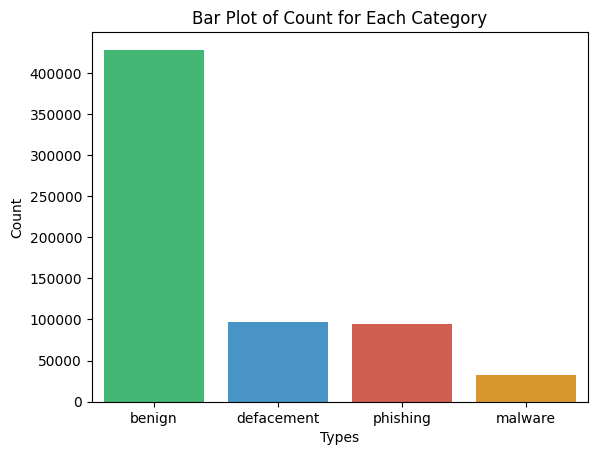

In [9]:
# Custom color palette with bright colors
custom_palette = ["#2ecc71", "#3498db", "#e74c3c", "#f39c12"]

# Plotting the bar plot with different colors for each category
sns.barplot(x=count.index, y=count, palette=custom_palette)


# Adding labels to the plot
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Bar Plot of Count for Each Category')

# Display the plot
plt.show()

In [10]:
# Remove 'www.' from the 'url' column using the replace method and a regular expression
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [11]:
# Display the first 10 rows of the DataFrame 'data'
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [12]:
# Creating a mapping dictionary for the 'Category' column, assigning numerical values to corresponding categories
rem = {"Category": {"benign": 0, "defacement": 1, "phishing": 2, "malware": 3}}

# Creating a new column 'Category' and replacing its values based on the mapping defined in the 'rem' dictionary
data['Category'] = data['type']

# Applying the replacement using the 'replace' method
data = data.replace(rem)

# Displaying the first 20 rows of the DataFrame with the updated 'Category' column
data.head(20)


,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://pashminaonline.com/pure-pashminas,defacement,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


### **TFIDF Vectoriser**

In [13]:
# Importing necessary libraries for TF-IDF vectorization
import pandas as pd
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', max_features=500)

# Applying TF-IDF vectorization to the 'url' column and converting it to a dense matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['url']).todense()

# Creating a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

# Concatenating the TF-IDF DataFrame with the original dataset
data_with_tfidf = pd.concat([data, tfidf_df], axis=1)

# Displaying the first 10 rows of the DataFrame with TF-IDF features
print(data_with_tfidf.head(10))

#This line of code is used to display the same 10 url values in a tabulated format
print(tabulate(data_truncated.head(10), headers='keys', tablefmt='fancy_grid'))

                                                 url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://garage-pirenne.be/index.php?option=com_...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   
5  http://buzzfil.net/m/show-art/ils-etaient-loin...      benign         0   
6      espn.go.com/nba/player/_/id/3457/brandon-rush      benign         0   
7     yourbittorrent.com/?q=anthony-hamilton-soulife      benign         0   
8           http://pashminaonline.com/pure-pashminas  defacement         1   
9      allmusic.com/album/crazy-from-the-heat-r16990      benign         0   

   000webhostapp   01   02   03   04   05   06  ...  wikipedia   wn  \
0            0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0  0.0   

In [14]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
from scipy.sparse import csr_matrix
from tabulate import tabulate  # Import the tabulate function

# Sample data (replace this with your actual data)
data_url = 'https://drive.google.com/uc?id=1hVTzUkdLfLcAAO7iV8EtWMduy0HrOP5b'
df = pd.read_csv(data_url)

# Download the WordNet resource
nltk.download('wordnet')

# Instantiate WordNetLemmatizer
wnl = WordNetLemmatizer()

# Process only the first 10 URLs
batch_df = df.head(10).copy()

# Lemmatize the 'url' column
batch_df['lem_url'] = batch_df['url'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))

# Applying TF-IDF vectorization to the 'url' column
url_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', max_features=500)
url_tfidf_matrix = url_vectorizer.fit_transform(batch_df['url'])
url_tfidf_matrix = csr_matrix(url_tfidf_matrix)  # Convert to sparse matrix
url_tfidf_df = pd.DataFrame(url_tfidf_matrix.toarray(), columns=url_vectorizer.get_feature_names_out())

# Applying TF-IDF vectorization to the 'lem_url' column
word_vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=1000)
lem_url_tfidf_matrix = word_vectorizer.fit_transform(batch_df['lem_url'])
lem_url_tfidf_matrix = csr_matrix(lem_url_tfidf_matrix)  # Convert to sparse matrix
lem_url_tfidf_df = pd.DataFrame(lem_url_tfidf_matrix.toarray(), columns=word_vectorizer.get_feature_names_out())
lem_url_tfidf_df[lem_url_tfidf_df > 0] = 1  # Convert non-zero values to 1

# Free up memory
del url_tfidf_matrix, lem_url_tfidf_matrix

# Concatenate the TF-IDF DataFrames with the original dataset
batch_df_with_tfidf = pd.concat([batch_df, url_tfidf_df, lem_url_tfidf_df], axis=1)

# Truncate each column to 20 characters
data_truncated = batch_df_with_tfidf.apply(lambda x: x.astype(str).str[:10])

# Display the resulting DataFrame using tabulate
print(tabulate(data_truncated, headers='keys', tablefmt='fancy_grid'))


[nltk_data] Downloading package wordnet to /root/nltk_data...


╒════╤════════════╤════════════╤════════════╤═════════╤══════════╤═════════╤═════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╤══════════╤════════════╤═══════════╤══════════╤═══════════╤══════════════╤══════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════════╤══════════════╤═════════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤═════════════╤══════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤════════════╤══════════╤════════════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤═════════════╤══════════╤══════════╤══════════════════╤═════════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤══════════╤═════════╤════════════╤══════════╤══════════════════╤══════╤════════

### **Training and tesing the Dataset**

Streaming output truncated to the last 5000 lines.
Epoch [2/5000], Training Loss: 0.9441, Training Accuracy: 17.45%
Epoch [3/5000], Training Loss: 0.9148, Training Accuracy: 17.05%
Epoch [4/5000], Training Loss: 0.8868, Training Accuracy: 17.66%
Epoch [5/5000], Training Loss: 0.8602, Training Accuracy: 18.89%
Epoch [6/5000], Training Loss: 0.8348, Training Accuracy: 19.80%
Epoch [7/5000], Training Loss: 0.8107, Training Accuracy: 20.97%
Epoch [8/5000], Training Loss: 0.7878, Training Accuracy: 22.96%
Epoch [9/5000], Training Loss: 0.7660, Training Accuracy: 26.32%
Epoch [10/5000], Training Loss: 0.7453, Training Accuracy: 35.63%
Epoch [11/5000], Training Loss: 0.7257, Training Accuracy: 48.19%
Epoch [12/5000], Training Loss: 0.7070, Training Accuracy: 48.38%
Epoch [13/5000], Training Loss: 0.6893, Training Accuracy: 48.80%
Epoch [14/5000], Training Loss: 0.6725, Training Accuracy: 49.06%
Epoch [15/5000], Training Loss: 0.6565, Training Accuracy: 49.45%
Epoch [16/5000], Training Loss: 0

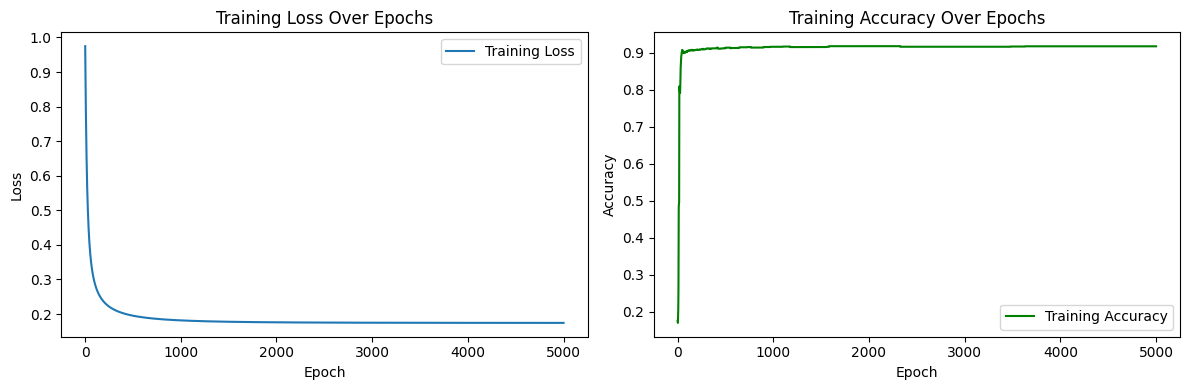

In [15]:
# Preprocessing and Logistic Regression Model

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Loading, preprocessing, and Logistic Regression Model
data = pd.read_csv(file_path)

# Preprocessing URL data
# Assuming 'data' is your DataFrame
data['num_dots'] = data['url'].apply(lambda x: str(x).count('.'))
threshold_dots = 3
data['is_bad_url'] = data['num_dots'] > threshold_dots

# Additional preprocessing for URL length
data['url_len'] = data['url'].apply(lambda x: len(str(x)))
threshold_length = 90
data['is_bad_url'] = (data['url_len'] > threshold_length) | data['is_bad_url']

# Features: url length and number of dots
features = data[['url_len', 'num_dots']]
labels = data['is_bad_url']

# Encode Labels using Label Encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert to float and normalize to the range [0, 1]
normalized_labels = encoded_labels.astype(float) / max(encoded_labels)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, normalized_labels, test_size=0.2, random_state=42)

# Standardize Features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Ensure it's a column vector

# Define Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = LogisticRegressionModel(input_size=X_train.shape[1])

# Define Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.0001)

# Train the Model
epochs = 5000
training_losses = []  # initialize the list
accuracy_list = []  # initialize the list for accuracy

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the training loss for the current epoch
    training_losses.append(loss.item())

    # Calculate training accuracy
    predictions_binary = (outputs >= 0.5).float()
    accuracy_train = (predictions_binary == y_train_tensor).float().mean().item()
    accuracy_list.append(accuracy_train)

    # Print the current epoch, training loss, and accuracy
    print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {training_losses[-1]:.4f}, Training Accuracy: {accuracy_train * 100:.2f}%')

# Evaluate on Test Data
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    predictions_binary = (predictions >= 0.5).float()
    accuracy = (predictions_binary == y_test_tensor).float().mean().item()

print(f"Accuracy on the test dataset: {accuracy * 100:.2f}%")

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_list, label='Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
